# Libraries

In [84]:
import joblib
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, Pool, CatBoostRegressor, CatBoostRanker
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare Data

In [2]:
# Load from pkl
xall, yall, harai = joblib.load("./data.pkl")

In [3]:
# Input features
xall

,raceid,horseid,racedate,futan,umaban,wakuban,blinker,age,bataijyu,zogen,...,grade_5,wintime_5,lap_s3_5,lap_s4_5,lap_l3_5,lap_l4_5,f,ff,m,mf
0,2020010506010101,2017103291,20200105,54.0,1,1,0,3.0,432.0,4.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220057e+09,1.120002e+09
1,2020010506010101,2017101861,20200105,54.0,2,1,0,3.0,424.0,-4.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.140004e+09,1.220063e+09,1.120002e+09
2,2020010506010101,2017103186,20200105,54.0,3,2,0,3.0,458.0,0.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220061e+09,1.140006e+09
3,2020010506010101,2017102095,20200105,53.0,4,2,0,3.0,464.0,10.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220062e+09,1.120002e+09
4,2020010506010101,2017103287,20200105,52.0,5,3,1,3.0,460.0,-2.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.140006e+09,1.220062e+09,1.140005e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143318,2022122809060912,2018105223,20221228,53.0,12,6,0,4.0,452.0,0.0,...,E,69.4,33.6,45.3,35.8,46.9,1.140007e+09,1.140005e+09,1.220065e+09,1.140006e+09
143319,2022122809060912,2017106137,20221228,56.0,13,7,0,5.0,492.0,6.0,...,E,67.3,32.8,44.1,34.5,45.4,1.120002e+09,1.140004e+09,1.220050e+09,1.120002e+09
143320,2022122809060912,2017100461,20221228,56.0,14,7,0,5.0,504.0,4.0,...,E,80.4,35.6,47.1,33.3,44.8,1.120002e+09,1.140004e+09,1.220055e+09,1.120002e+09
143321,2022122809060912,2018106389,20221228,52.0,15,8,0,4.0,434.0,2.0,...,E,68.4,33.7,45.0,34.7,45.7,1.120002e+09,1.140005e+09,1.220063e+09,1.120002e+09


In [4]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
print(xall.columns)

Index(['raceid', 'horseid', 'racedate', 'futan', 'umaban', 'wakuban',
       'blinker', 'age', 'bataijyu', 'zogen',
       ...
       'grade_5', 'wintime_5', 'lap_s3_5', 'lap_s4_5', 'lap_l3_5', 'lap_l4_5',
       'f', 'ff', 'm', 'mf'],
      dtype='object', length=224)


In [5]:
# # Output feature: finishing position (0: race not finished)
yall

0          2
1         12
2          3
3         11
4          8
          ..
143318    12
143319    16
143320    11
143321     7
143322     8
Name: jyuni, Length: 143323, dtype: int64

In [6]:
# Payout
harai

,RaceID,TorokuTosu,SyussoTosu,FuseirituFlag,TokubaraiFlag,HenkanFlag,HenkanUma,HenkanWaku,HenkanDoWaku,PayTansyo,...,PayReserved1,PayUmatan,PaySanrenpuku,PaySanrentan,Year,MonthDay,JyoCD,Kaiji,Nichiji,RaceNum
0,2020010606010203,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '09', 'Pay': '000000200', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0913', 'Pay': '000000510', 'Ninki':...","[{'Kumi': '080913', 'Pay': '000001270', 'Ninki...","[{'Kumi': '091308', 'Pay': '000003840', 'Ninki...",2020,0106,06,01,02,03
1,2022010507010112,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '13', 'Pay': '000001530', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '1315', 'Pay': '000004070', 'Ninki':...","[{'Kumi': '061315', 'Pay': '000002720', 'Ninki...","[{'Kumi': '131506', 'Pay': '000026590', 'Ninki...",2022,0105,07,01,01,12
2,2020010506010101,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '07', 'Pay': '000000360', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0701', 'Pay': '000003650', 'Ninki':...","[{'Kumi': '010307', 'Pay': '000098210', 'Ninki...","[{'Kumi': '070103', 'Pay': '000280650', 'Ninki...",2020,0105,06,01,01,01
3,2020010606010204,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '12', 'Pay': '000000280', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '1211', 'Pay': '000003040', 'Ninki':...","[{'Kumi': '031112', 'Pay': '000000920', 'Ninki...","[{'Kumi': '121103', 'Pay': '000008340', 'Ninki...",2020,0106,06,01,02,04
4,2020010606010205,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '07', 'Pay': '000000380', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0716', 'Pay': '000001730', 'Ninki':...","[{'Kumi': '070916', 'Pay': '000002130', 'Ninki...","[{'Kumi': '071609', 'Pay': '000009690', 'Ninki...",2020,0106,06,01,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,2022122806050903,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '01', 'Pay': '000000600', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0107', 'Pay': '000004600', 'Ninki':...","[{'Kumi': '010307', 'Pay': '000023600', 'Ninki...","[{'Kumi': '010703', 'Pay': '000094870', 'Ninki...",2022,1228,06,05,09,03
10364,2022122806050902,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '04', 'Pay': '000000750', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0406', 'Pay': '000030980', 'Ninki':...","[{'Kumi': '040611', 'Pay': '000013110', 'Ninki...","[{'Kumi': '040611', 'Pay': '000138570', 'Ninki...",2022,1228,06,05,09,02
10365,2022122809060911,13,13,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
print(harai.columns)

Index(['RaceID', 'TorokuTosu', 'SyussoTosu', 'FuseirituFlag', 'TokubaraiFlag',
       'HenkanFlag', 'HenkanUma', 'HenkanWaku', 'HenkanDoWaku', 'PayTansyo',
       'PayFukusyo', 'PayWakuren', 'PayUmaren', 'PayWide', 'PayReserved1',
       'PayUmatan', 'PaySanrenpuku', 'PaySanrentan', 'Year', 'MonthDay',
       'JyoCD', 'Kaiji', 'Nichiji', 'RaceNum'],
      dtype='object')


In [8]:
print(harai["PaySanrentan"][0])

[{'Kumi': '091308', 'Pay': '000003840', 'Ninki': '0006'}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}]


In [9]:
'''
Preprocess data
'''

# Convert string values to float
for col in xall.columns:
    if xall[col].dtype == "object":
        # Convert to numeric where possible
        xall[col] = pd.to_numeric(xall[col], errors='coerce')
        # Replace NaN (from non-numeric values) with 0
        xall[col] = xall[col].fillna(0)
        print(f"Converted column: {col}")

Converted column: KisyuCode
Converted column: TozaiCD
Converted column: ChokyosiCode
Converted column: BanusiCode
Converted column: course
Converted column: cls
Converted column: grade
Converted column: BreederCode
Converted column: KisyuCode_1
Converted column: course_1
Converted column: cls_1
Converted column: grade_1
Converted column: KisyuCode_2
Converted column: course_2
Converted column: cls_2
Converted column: grade_2
Converted column: KisyuCode_3
Converted column: course_3
Converted column: cls_3
Converted column: grade_3
Converted column: KisyuCode_4
Converted column: course_4
Converted column: cls_4
Converted column: grade_4
Converted column: KisyuCode_5
Converted column: course_5
Converted column: cls_5
Converted column: grade_5


In [10]:
'''
Split into Train-Test data
'''
# Number of days to use of testing
TEST_DAYS = 90

# Date at which the data splits
rd = xall["racedate"].unique()[-TEST_DAYS] 

# split data
xtrain = xall[xall['racedate']<rd].reset_index(drop=True).copy()
ytrain = yall[xtrain.index].reset_index(drop=True).copy()
xtest = xall[xall['racedate']>=rd].reset_index(drop=True).copy()
ytest = yall[xtest.index].reset_index(drop=True).copy()

In [11]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(104436, 224) (104436,) (38887, 224) (38887,)


# Evaluation Baseline

In [12]:
def evaluate(xtest, ytest, ypred, harai, apply_bet):
    # Real rankings - jyuni is matrix of shape (num_races × 18)
    tmp = xtest.copy()
    tmp["jyuni"] = ytest
    tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
    jyuni = np.array([[tmp[i][j] if j < len(tmp[i]) else j+1 for j in range(18)] 
                      for i in range(tmp.shape[0])])  # padding for missing horses
    # Predicted ranking -  'pred' is a matrix of shape (num_races × 18) 
    tmp = xtest.copy()
    tmp["pred"] = ypred
    tmp = tmp.groupby("raceid", as_index=False).apply(
        lambda x: np.argsort(np.argsort(-x["pred"].values)) + 1
    )
    pred = np.array([[tmp[i][j] if j < len(tmp[i]) else j+1 for j in range(18)] 
                     for i in range(tmp.shape[0])])  # padding

    # df_bet: extract unique raceid rows
    df_bet = xtest[["raceid"]].groupby("raceid", as_index=False).apply(lambda x: x.iloc[0])

    # Align payout data
    harai = harai.copy()
    harai.columns = [x.replace("RaceID", "raceid") for x in harai.columns]
    harai.raceid = harai.raceid.astype(int)

    # Apply bet (hit rate)
    mrr, total_payout = apply_bet(pred, jyuni, df_bet, harai, xtest)

    return mrr, total_payout

def apply_bet_tansyo(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        # Which horse was 1st ?
        indices = np.where(jyuni[i, :] == 1) 
        if indices[0].size > 0:
            # How was his rank prediction ?
            res.append(1 / pred[i, np.min(indices)])
    mrr = np.mean(res)

    print("MRR: ", mrr)

    # Predicted bet - Tansyo: #1
    predicted_bet = [[np.where(pred[i, :] == 1)[0][0] + 1] for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet

    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"]==raceid]["predicted_bet"].values[0]
        # Select target race
        try:
            tmp = harai[harai.raceid==raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winner (list because ties possible)
        true = [x["Umaban"] for x in tmp["PayTansyo"] if x["Umaban"].strip() != ""]
        # Compute Pay for the true winner
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayTansyo"] if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}
        # Compute Henkan (refunded amounts)
        henkan = sum([int(tmp["HenkanUma"][x-1]) for x in pred])
        # convert ranking from int to string
        pred_str = [f"{x:02}" for x in pred]  

        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(lambda x: sum([y in x["true"] for y in x["pred"]]) >= 1, axis=1).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(lambda x: sum([x["pay"][y] if y in x["true"] else 0 for y in x["pred"]]) + x["henkan"]*100, axis=1).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)

def apply_bet_fukusyo(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        top3_indices = np.where(jyuni[i, :] <= 3)[0]
        if top3_indices.size > 0:
            res.append(
                np.mean([1 / pred[i, idx] for idx in top3_indices])
            )
    mrr = np.mean(res)

    print("MRR: ", mrr)

    # Predicted bet - Fukusyo: #1, #2 or #3
    predicted_bet = [[np.where(pred[i, :] <= 3)[0][0] + 1] for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"]==raceid]["predicted_bet"].values[0]
        # Select target race
        try:
            tmp = harai[harai.raceid==raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winner (list because ties possible)
        true = [x["Umaban"] for x in tmp["PayFukusyo"] if x["Umaban"].strip() != ""]
        # Compute Pay for the true winner
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayFukusyo"] if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}
        # Compute Henkan (refunded amounts)
        henkan = sum([int(tmp["HenkanUma"][x-1]) for x in pred])
        # convert ranking from int to string
        pred_str = [f"{x:02}" for x in pred]  

        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(lambda x: sum([y in x["true"] for y in x["pred"]]) >= 1, axis=1).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(lambda x: sum([x["pay"][y] if y in x["true"] else 0 for y in x["pred"]]) + x["henkan"]*100, axis=1).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)

def apply_bet_wakuren(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    tmp = xtest.copy()
    tmp["wakuban"] = (tmp["umaban"].astype(int) + 1) // 2

    tmp = tmp.groupby("raceid", as_index=False).apply(
        lambda x: x["wakuban"].values
    )

    bracket_ids = np.array([
        [tmp[i][j] if j < len(tmp[i]) else -1 for j in range(18)]
        for i in range(tmp.shape[0])
    ])
    res = []

    for i in range(jyuni.shape[0]):
        true_idx = np.where(jyuni[i] <= 2)[0]
        if true_idx.size < 2:
            continue

        true_brackets = set(bracket_ids[i, true_idx])

        br_rank = {}
        for b in np.unique(bracket_ids[i]):
            if b == -1:
                continue
            br_rank[b] = np.min(pred[i, bracket_ids[i] == b])

        pair_rank = max(br_rank[b] for b in true_brackets)
        res.append(1 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)
    
    # Predicted bet - Wakuren: #1 and #2 brackets (any order)
    predicted_bet = []
    for i in range(pred.shape[0]):
        br_rank = {}
        for b in np.unique(bracket_ids[i]):
            if b == -1:
                continue
            br_rank[b] = np.min(pred[i, bracket_ids[i] == b])

        top2_brackets = sorted(br_rank, key=br_rank.get)[:2]
        predicted_bet.append(top2_brackets)

    df_bet["predicted_bet"] = predicted_bet
    
    res = []

    for _, row in df_bet.iterrows():
        raceid = row["raceid"]
        pred_brackets = row["predicted_bet"]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [
            "".join(sorted(x["Umaban"]))
            for x in tmp["PayWakuren"]
            if x["Umaban"].strip() != ""
        ]

        pay = {
            "".join(sorted(x["Umaban"])): int(x["Pay"])
            for x in tmp["PayWakuren"]
            if x["Umaban"].strip() != "" and x["Pay"].strip() != ""
        }

        pred_key = "".join(sorted(str(b) for b in pred_brackets))

        # Henkan ignored for Wakuren (bracket-based)
        henkan = 0

        res.append({
            "raceid": raceid,
            "pred": pred_key,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)


def apply_bet_umaren(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        true_idx = np.where(jyuni[i] <= 2)[0]
        if true_idx.size < 2:
            continue

        pred_ranks = [pred[i, idx] for idx in true_idx]
        pair_rank = max(pred_ranks)
        res.append(1 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Umaren: #1 and #2 (any order)
    predicted_bet = [list(np.argsort(pred[i])[:2] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"]==raceid]["predicted_bet"].values[0]
        # Select target race
        try:
            tmp = harai[harai.raceid==raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]]))
            for x in tmp["PayUmaren"]
            if x["Kumi"].strip() != ""
        ]
        # Compute Pay for the true winners
        pay = {
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]])): int(x["Pay"])
            for x in tmp["PayUmaren"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }
        # Compute Henkan (refunded amounts)
        henkan = sum([int(tmp["HenkanUma"][x-1]) for x in pred])
        # convert rankings from int to string
        pred_str = "".join(sorted([f"{pred[0]:02}", f"{pred[1]:02}"]))
           
        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
    lambda x: x["pred"] in x["true"],
    axis=1
    ).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
    lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
    axis=1
    ).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)

def apply_bet_wide(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        # Horses that truly finished top 3
        top3_idx = np.where(jyuni[i] <= 3)[0]
        if top3_idx.size < 2:
            continue

        best_score = 0.0
        for a in range(len(top3_idx)):
            for b in range(a + 1, len(top3_idx)):
                h1 = top3_idx[a]
                h2 = top3_idx[b]

                pair_rank = max(pred[i, h1], pred[i, h2])
                score = 1.0 / pair_rank

                if score > best_score:
                    best_score = score

        res.append(best_score)
    
    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Wide: #1 and #2 or #1 and #3 or #2 and #3 (any order)
    predicted_bet = []
    for i in range(pred.shape[0]):
        top3 = np.argsort(pred[i])[:3]
        pairs = [list([top3[j]+1, top3[k]+1]) for j in range(3) for k in range(j+1,3)]
        predicted_bet.append(pairs)
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"]==raceid]["predicted_bet"].values[0]
        # Select target race
        try:
            tmp = harai[harai.raceid==raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]]))
            for x in tmp["PayUmaren"]
            if x["Kumi"].strip() != ""
        ]
        # Compute Pay for the true winners
        pay = {
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]])): int(x["Pay"])
            for x in tmp["PayWide"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }
        # Compute Henkan (refunded amounts)
        flat_horses = sorted(set(h for pair in pred for h in pair))
        henkan = sum(int(tmp["HenkanUma"][h-1]) for h in flat_horses)
        # convert rankings from int to string
        pred_pairs = [
            "".join(sorted([f"{a:02}", f"{b:02}"]))
            for a, b in pred
        ]
           
        res.append({"pred": pred_pairs, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
    lambda x: any(p in x["true"] for p in x["pred"]),
    axis=1
    ).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
    lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
    axis=1
    ).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)

def apply_bet_sanrenpuku(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        top3_idx = np.where(jyuni[i] <= 3)[0]
        if top3_idx.size < 3:
            continue

        ranks = pred[i, top3_idx]
        comb_rank = np.max(ranks)
        res.append(1.0 / comb_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)
    

    # Predicted bet - Sanrenpuku: #1 and #2 and #3 (any order)
    predicted_bet = [list(np.argsort(pred[i])[:3] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"]==raceid]["predicted_bet"].values[0]
        # Select target race
        try:
            tmp = harai[harai.raceid==raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        
        true = [x["Kumi"] for x in tmp["PaySanrenpuku"] if x["Kumi"].strip() != ""]
        pay = {x["Kumi"]: int(x["Pay"]) for x in tmp["PaySanrenpuku"]
               if x["Kumi"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(
            int(tmp["HenkanUma"][x-1])
            for x in pred
            if str(tmp["HenkanUma"][x-1]).strip() != ""
        )
        # Check true winners (list because ties possible)
        true = [
            "".join(sorted([
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ]))
            for x in tmp["PaySanrenpuku"]
            if x["Kumi"].strip() != ""
        ]
        
        # Compute Pay for the true winners
        pay = {
            "".join(sorted([
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ])): int(x["Pay"])
            for x in tmp["PaySanrenpuku"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum([int(tmp["HenkanUma"][x-1]) for x in pred])
        # convert rankings from int to string
        pred_str = "".join(sorted(f"{x:02}" for x in pred))
           
        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
    lambda x: "".join(sorted(x["pred"])) in x["true"],
    axis=1
    ).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
    lambda x: x["pay"].get("".join(sorted(x["pred"])), 0) + x["henkan"] * 100,
    axis=1
    ).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)

def apply_bet_umatan(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx_1 = np.where(jyuni[i] == 1)[0]
        idx_2 = np.where(jyuni[i] == 2)[0]

        if idx_1.size == 0 or idx_2.size == 0:
            continue

        h1 = idx_1[0]
        h2 = idx_2[0]

        pair_rank = max(pred[i, h1], pred[i, h2])
        res.append(1.0 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Umatan: #1 and #2 (exact order)
    predicted_bet = [list(np.argsort(pred[i])[:2] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"]==raceid]["predicted_bet"].values[0]
        # Select target race
        try:
            tmp = harai[harai.raceid==raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

    
        # Check true winners (list because ties possible)
        true = [
            (x["Kumi"][:2], x["Kumi"][2:]) 
            for x in tmp["PayUmatan"]
            if x["Kumi"].strip() != ""
        ]
        # Compute Pay for the true winners
        pay = {
            (x["Kumi"][:2], x["Kumi"][2:]): int(x["Pay"]) 
            for x in tmp["PayUmatan"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }
        # Compute Henkan (refunded amounts)
        henkan = sum([int(tmp["HenkanUma"][x-1]) for x in pred])
        # convert rankings from int to string
        pred_str = (f"{pred[0]:02}", f"{pred[1]:02}")
           
        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
    lambda x: x["pred"] in x["true"],
    axis=1
    ).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
    lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
    axis=1
    ).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)


def apply_bet_sanrentan(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        first = np.where(jyuni[i] == 1)[0]
        second = np.where(jyuni[i] == 2)[0]
        third = np.where(jyuni[i] == 3)[0]

        if first.size == 0 or second.size == 0 or third.size == 0:
            continue

        r1 = pred[i, first[0]]
        r2 = pred[i, second[0]]
        r3 = pred[i, third[0]]

        comb_rank = max(r1, r2, r3)
        res.append(1.0 / comb_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Sanrentan: #1 and #2 and #3 (exact order)
    predicted_bet = [
        list(np.argsort(pred[i])[:3] + 1)
        for i in range(pred.shape[0])
    ]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"]==raceid]["predicted_bet"].values[0]
        # Select target race
        try:
            tmp = harai[harai.raceid==raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        
        true = [x["Kumi"] for x in tmp["PaySanrenpuku"] if x["Kumi"].strip() != ""]
        pay = {x["Kumi"]: int(x["Pay"]) for x in tmp["PaySanrenpuku"]
               if x["Kumi"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(
            int(tmp["HenkanUma"][x-1])
            for x in pred
            if str(tmp["HenkanUma"][x-1]).strip() != ""
        )
        # Check true winners (list because ties possible)
        true = [
            (
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            )
            for x in tmp["PaySanrentan"]
            if x["Kumi"].strip() != ""
        ]
        
        # Compute Pay for the true winners
        pay = {
            (
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ): int(x["Pay"])
            for x in tmp["PaySanrentan"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum([int(tmp["HenkanUma"][x-1]) for x in pred])
        # convert rankings from int to string
        pred_str = (
            f"{pred[0]:02}",
            f"{pred[1]:02}",
            f"{pred[2]:02}",
        )
           
        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
    lambda x: "".join(sorted(x["pred"])) in x["true"],
    axis=1
    ).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1), np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
    lambda x: x["pay"].get("".join(sorted(x["pred"])), 0) + x["henkan"] * 100,
    axis=1
    ).values
    harai = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi/harai), np.std(modoshi/harai, ddof=1), np.std(modoshi/harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi)

# Winner prediction

## Models

In [13]:
model_prediction_winner = {}

### Light Gradient Boosting Machine (Binary)

In [14]:
# Binarize outputs (simplify ranking to win / lose)
ytrain_lgb = ytrain.apply(lambda x: 1 if x==1 else 0)
ytest_lgb = ytest.apply(lambda x: 1 if x==1 else 0)

In [15]:
# Training parameters
num_boost_round = 100
early_stopping_round = 10
lgb_train_parameters = {
 'max_depth': 10,
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'seed': 1,
 'objective': 'binary',
 'metric': 'binary_logloss',
}

In [16]:
# Validation data (training_data=validation_data）
xtrain_val = xtrain.copy()
ytrain_val_lgb = ytrain_lgb.copy()
xtest_val = xtrain.copy()
ytest_val_lgb = ytrain_lgb.copy()

In [17]:
# Prepare dataset for LGB model
train_data_lgb = lgb.Dataset(xtrain_val, label=ytrain_val_lgb)
valid_data_lgb = lgb.Dataset(xtest_val, label=ytest_val_lgb)

In [18]:
# Train a LGB model on our dataset
gbm = lgb.train(lgb_train_parameters,
                train_data_lgb,
                valid_sets=[valid_data_lgb],
                num_boost_round=num_boost_round,
                callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_round,
                            verbose=1)]
               )

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Number of positive: 7532, number of negative: 96904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17338
[LightGBM] [Info] Number of data points in the train set: 104

In [19]:
# Predict
ypred = gbm.predict(xtest)
model_prediction_winner['LightGBM'] = ypred

### XGBoost (Binary)

In [20]:
# XGBoost Official Defaults Baseline
xgb_train_param = {
    "n_estimators": 100,
    "max_depth": 6,
    "learning_rate": 0.3,
    "objective": 'binary:logistic',
    "random_state": 42  # reproducibility
}

In [21]:
# 1. Initialize with the Classifier
bst = xgb.XGBClassifier(**xgb_train_param)
# 2. Fit model
# Note: Ensure ytrain is binary (0 or 1)
bst.fit(xtrain, ytrain)
# 3. FIX: Use predict_proba to get continuous scores
# [:, 1] selects the probability for the 'Win' class
ypred = bst.predict_proba(xtest)[:, 1]
model_prediction_winner['XGBoost'] = ypred
print("XGBoost Winner Strategy fixed: Now using probabilities.")

XGBoost Winner Strategy fixed: Now using probabilities.


### Catboost (Binary)

In [22]:
# Standard Baseline Parameters
cb_train_param = {
    "iterations": 1000,         # Standard default
    "learning_rate": None,      # Automatically scales based on dataset size
    "depth": 6,                 # The "Goldilocks" depth for CatBoost
    "loss_function": 'Logloss', # Standard for binary
    "bootstrap_type": 'MVS',    # Standard for CPU training
    "verbose": 100              # Standard to see if it's actually learning
}

In [23]:
# 1. Initialize
# We use the parameters from your Cell 1
bst = CatBoostClassifier(**cb_train_param)
# 2. Fit the model
# Using (ytrain == 1) ensures we are predicting ONLY the 1st place winner
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get the continuous winning probability
# [:, 1] grabs the probability of being the winner (Class 1)
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['CatBoost'] = ypred
print("CatBoost Winner Strategy fixed: Continuous probabilities generated.")

Learning rate set to 0.074986
0:	learn: 0.6027906	total: 70.2ms	remaining: 1m 10s
100:	learn: 0.2020550	total: 2.05s	remaining: 18.3s
200:	learn: 0.1972165	total: 3.98s	remaining: 15.8s
300:	learn: 0.1920777	total: 5.9s	remaining: 13.7s
400:	learn: 0.1870432	total: 7.98s	remaining: 11.9s
500:	learn: 0.1822325	total: 9.94s	remaining: 9.9s
600:	learn: 0.1779849	total: 12.1s	remaining: 8s
700:	learn: 0.1734606	total: 14s	remaining: 5.99s
800:	learn: 0.1695032	total: 16s	remaining: 3.98s
900:	learn: 0.1656794	total: 17.9s	remaining: 1.97s
999:	learn: 0.1617462	total: 19.9s	remaining: 0us
CatBoost Winner Strategy fixed: Continuous probabilities generated.


### Random Forest Classifier

In [24]:
# Random Forest Official Defaults Baseline
rf_train_param = {
    "n_estimators": 100,
    "max_depth": None,      # Traditional RF baseline allows deep trees
    "random_state": 42,     # For reproducible results
    "n_jobs": -1            # Uses all available CPU cores (highly recommended)
}

In [25]:
# 1. Initialize the Classifier
bst = RandomForestClassifier(**rf_train_param)
# 2. Fit the model
# We ensure ytrain is binary (1 for win, 0 for everything else)
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get the continuous winning probability
# [:, 1] extracts the probability of the "Win" class
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['RandomForest'] = ypred
print("Random Forest Winner Strategy fixed: Continuous probabilities generated.")

Random Forest Winner Strategy fixed: Continuous probabilities generated.


### Logistic Regression

In [26]:
# Logistic Regression Official Defaults Baseline
logreg_train_param = {
    "penalty": 'l2',
    "C": 1.0,
    "solver": 'lbfgs',
    "max_iter": 1000, # Increased to ensure convergence with many features
    "random_state": 42
}

In [28]:
# 1. Create a Pipeline: Impute (Fill NaNs) -> Scale (Normalize) -> Model
bst = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    StandardScaler(),
    LogisticRegression(**logreg_train_param)
)
# 2. Fit the model
# (ytrain == 1) ensures we are targeting only the winners
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get continuous winning probabilities
# [:, 1] extracts the probability for the "Win" class
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['LogisticRegression'] = ypred
print("Logistic Regression Winner Strategy fixed: Continuous probabilities generated.")

/home/noah/gakusai/Horse-Racing/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Logistic Regression Winner Strategy fixed: Continuous probabilities generated.


In [29]:
print (model_prediction_winner)

{'LightGBM': array([0.07041626, 0.03553426, 0.03783245, ..., 0.05919513, 0.02893051,
       0.06001361], shape=(38887,)), 'XGBoost': array([0.03809795, 0.00461143, 0.01389008, ..., 0.02950272, 0.00159297,
       0.01950072], shape=(38887,), dtype=float32), 'CatBoost': array([0.03234616, 0.01271957, 0.01241179, ..., 0.02537089, 0.00177007,
       0.0187347 ], shape=(38887,)), 'RandomForest': array([0.05, 0.01, 0.05, ..., 0.14, 0.08, 0.11], shape=(38887,)), 'LogisticRegression': array([0.11475826, 0.01563384, 0.03951771, ..., 0.02831218, 0.00126649,
       0.05032908], shape=(38887,))}


## Evaluation

### Tansyo

In [30]:
# Evaluate every model
results_winner_tansyo = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_winner_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23596079440398804
Number of races 2856
Number of hits 976
Hit rate 0.34173669467787116 0.4743748715278793 0.008876516691665327
Total payout 235830
Return rate 0.8257352941176471 1.2432512677833703 0.023263754664889724
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23710281024863278
Number of races 2856
Number of hits 925
Hit rate 0.3238795518207283 0.4680366319153344 0.008757915363700124
Total payout 238000
Return rate 0.8333333333333334 1.3757986588871498 0.02574398538575379
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23312770577216174
Number of races 2856
Number of hits 930
Hit rate 0.32563025210084034 0.4686919105568631 0.008770176957111442
Total payout 231840
Return rate 0.8117647058823529 1.2963352231644931 0.02425706321532474
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23227548241278068
Number of races 2856
Number of hits 887
Hit rate 0.31057422969187676 0.46280976118535266 0.0086601100032888
Total payout 224500
Return rate 0.7860644257703081 1.2843671892253201 0.02403311700863524
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.236276597628758
Number of races 2856
Number of hits 938
Hit rate 0.3284313725490196 0.46972487850684796 0.008789505884085301
Total payout 238020
Return rate 0.8334033613445377 1.2696833201884947 0.0237583520148998
※Mean, standard deviation, standard error


### Fukusyo

In [31]:
# Evaluate every model
results_winner_fukusyo = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_winner_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24037230131402737
Number of races 2856
Number of hits 1495
Hit rate 0.5234593837535014 0.4995368156839375 0.009347347738378716
Total payout 237530
Return rate 0.831687675070028 0.8819780081142924 0.01650359869504206
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24083261549228124
Number of races 2856
Number of hits 1418
Hit rate 0.4964985994397759 0.5000752959047466 0.009357423796270968
Total payout 232800
Return rate 0.8151260504201681 0.9281634606441385 0.017367822255140986
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24145805067640325
Number of races 2856
Number of hits 1488
Hit rate 0.5210084033613446 0.4996459327093201 0.009349389539399995
Total payout 239080
Return rate 0.8371148459383754 0.9003532730144636 0.016847437197859035
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23996139529745392
Number of races 2856
Number of hits 1389
Hit rate 0.48634453781512604 0.4999010189154559 0.009354162720068872
Total payout 225500
Return rate 0.7895658263305322 0.896564578042529 0.01677654302496643
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23990523887548446
Number of races 2856
Number of hits 1467
Hit rate 0.5136554621848739 0.499901018915456 0.009354162720068874
Total payout 234000
Return rate 0.819327731092437 0.8691709739008189 0.01626395309028969
※Mean, standard deviation, standard error


### Wakuren

In [32]:
# Evaluate every model
results_winner_wakuren = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_winner_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1690329064737981
Number of races 2856
Number of hits 200
Hit rate 0.0700280112044818 0.255238906497871 0.004776038002589699
Total payout 169330
Return rate 0.29644607843137255 1.973006669066469 0.036918959417744465
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1686761453425746
Number of races 2856
Number of hits 175
Hit rate 0.061274509803921566 0.23987515782801908 0.004488551080959035
Total payout 143590
Return rate 0.2513830532212885 1.7817637257531453 0.033340415779848254
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16955537459739142
Number of races 2856
Number of hits 193
Hit rate 0.06757703081232493 0.2510626334265112 0.004697891456784102
Total payout 164290
Return rate 0.2876225490196079 1.9486665212128824 0.036463505847861885
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16720989098891106
Number of races 2856
Number of hits 193
Hit rate 0.06757703081232493 0.2510626334265112 0.004697891456784102
Total payout 178650
Return rate 0.3127626050420168 2.1132334520310962 0.03954288714729515
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16937804721667418
Number of races 2856
Number of hits 194
Hit rate 0.06792717086834733 0.25166494895582686 0.004709162002865937
Total payout 166250
Return rate 0.29105392156862747 1.974471391955798 0.03694636735597255
※Mean, standard deviation, standard error


### Umaren

In [33]:
# Evaluate every model
results_winner_umaren = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_winner_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10683218481181735
Number of races 2856
Number of hits 428
Hit rate 0.14985994397759103 0.35699659006234774 0.006680130801089021
Total payout 221890
Return rate 0.19423144257703082 0.5384272315908146 0.010075066356422998
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10728468377592433
Number of races 2856
Number of hits 408
Hit rate 0.14285714285714285 0.34998838395249104 0.006548993040118649
Total payout 244880
Return rate 0.21435574229691878 0.645015962431848 0.012069557855111605
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10758789197793613
Number of races 2856
Number of hits 411
Hit rate 0.14390756302521007 0.35105744267123107 0.0065689972986298605
Total payout 222770
Return rate 0.19500175070028014 0.5707268769937408 0.01067945828095835
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10694757117417705
Number of races 2856
Number of hits 395
Hit rate 0.13830532212885155 0.34528061521481135 0.006460901131611944
Total payout 229130
Return rate 0.2005689775910364 0.5915120434252653 0.011068390932838132
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10748972810253254
Number of races 2856
Number of hits 411
Hit rate 0.14390756302521007 0.35105744267123107 0.0065689972986298605
Total payout 224690
Return rate 0.19668242296918767 0.5392007580004341 0.01008954060558446
※Mean, standard deviation, standard error


### Wide

In [34]:
# Evaluate every model
results_winner_wide = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_winner_wide[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17458843894886358
Number of races 2856
Number of hits 900
Hit rate 0.31512605042016806 0.46464741151804545 0.008694496170918324
Total payout 684330
Return rate 0.798704481792717 1.0048635738607217 0.018803037052726672
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1753165000615401
Number of races 2856
Number of hits 853
Hit rate 0.29866946778711484 0.4577547213638053 0.008565519947941904
Total payout 695340
Return rate 0.8115546218487396 1.1301660401702887 0.021147700525564812
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17513541382493697
Number of races 2856
Number of hits 905
Hit rate 0.3168767507002801 0.4653404081823346 0.008707463545092295
Total payout 716760
Return rate 0.8365546218487394 1.0794114789890727 0.020197979668614374
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17545314333601836
Number of races 2856
Number of hits 806
Hit rate 0.2822128851540616 0.4501552231083274 0.00842331791077294
Total payout 668430
Return rate 0.7801470588235295 1.1005388664734679 0.02059331597100427
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17513181179470774
Number of races 2856
Number of hits 902
Hit rate 0.3158263305322129 0.46492552549755184 0.008699700247966763
Total payout 694100
Return rate 0.810107376283847 1.0280073675980257 0.019236104408836757
※Mean, standard deviation, standard error


### Sanrenpuku

In [35]:
# Evaluate every model
results_winner_sanrenpuku = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_winner_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.0886391241302713
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.026458171328421428 0.0004950860880789111
Total payout 2420
Return rate 0.0014122315592903828 0.0544850599246001 0.0010195260602851614
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08934658831440039
Number of races 2856
Number of hits 1
Hit rate 0.00035014005602240897 0.018712029714127994 0.00035014005602240897
Total payout 960
Return rate 0.0005602240896358544 0.029939247542604793 0.0005602240896358544
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08921721334349732
Number of races 2856
Number of hits 1
Hit rate 0.00035014005602240897 0.018712029714127994 0.00035014005602240897
Total payout 1160
Return rate 0.0006769374416433241 0.030260091511692226 0.0005662277315190172
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08889518184260464
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.026458171328421428 0.0004950860880789111
Total payout 9770
Return rate 0.005701447245564892 0.049381050472761714 0.0009240196837611714
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08948169955218292
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.026458171328421428 0.0004950860880789111
Total payout 11120
Return rate 0.006489262371615312 0.06159885387609572 0.0011526395840857314
※Mean, standard deviation, standard error


### Umatan

In [36]:
# Evaluate every model
results_winner_umatan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_winner_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11645448929027229
Number of races 2856
Number of hits 261
Hit rate 0.09138655462184873 0.2882084945617448 0.005392965914103465
Total payout 216360
Return rate 0.37878151260504206 1.397106612269403 0.026142700442589765
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11703985776277132
Number of races 2856
Number of hits 229
Hit rate 0.08018207282913166 0.27162242344555043 0.005082606858536596
Total payout 224780
Return rate 0.3935224089635855 1.647703402458979 0.03083187502688221
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11721361327405579
Number of races 2856
Number of hits 239
Hit rate 0.08368347338935574 0.27696102254105287 0.005182502883443454
Total payout 216310
Return rate 0.3786939775910364 1.542291268455901 0.02885940004318697
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11633638130138241
Number of races 2856
Number of hits 217
Hit rate 0.07598039215686274 0.2650131377650499 0.00495893370849391
Total payout 207410
Return rate 0.3631127450980392 1.485247528144222 0.027791995879469834
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11657172586785933
Number of races 2856
Number of hits 242
Hit rate 0.08473389355742297 0.2785340645855317 0.005211937692921315
Total payout 210630
Return rate 0.36875 1.373007671382158 0.025691760344628622
※Mean, standard deviation, standard error


### Sanrentan

In [37]:
# Evaluate every model
results_winner_sanrentan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_winner_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09415369949803236
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 0
Return rate 0.0 0.0 0.0
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09435561234341722
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 0
Return rate 0.0 0.0 0.0
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09378497486460184
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 200
Return rate 0.0002334267040149393 0.008819390442807142 0.00016502869602630368
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09345128769447276
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 7900
Return rate 0.009220354808590103 0.054676168464437166 0.0010231020889612161
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.0940703716708021
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 8700
Return rate 0.010154061624649859 0.05797040461717966 0.0010847439337366884
※Mean, standard deviation, standard error


# Prediction - Ranking

## Models

In [42]:
model_prediction_ranking = {}

### LightGBM (rank:pair-wise)

In [38]:
# Training parameters
num_boost_round = 100
early_stopping_round = 10

lgb_train_parameters = {
 'objective': 'lambdarank',
 'metric': 'ndcg',
 'max_depth': 10,
 'num_leaves': 70,           # Added this to fix the warning
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'seed': 1,
}

In [39]:
# 1. Calculate Group/Query info (Number of horses per raceid)
# We MUST sort by raceid first to ensure horses in the same race are in consecutive rows
xtrain_val = xtrain_val.sort_values('raceid')
ytrain_val_lgb = ytrain_val_lgb.loc[xtrain_val.index]

xtest_val = xtest_val.sort_values('raceid')
ytest_val_lgb = ytest_val_lgb.loc[xtest_val.index]

# This creates the missing q_train and q_val variables
q_train = xtrain_val.groupby('raceid')['raceid'].count().to_numpy()
q_val = xtest_val.groupby('raceid')['raceid'].count().to_numpy()

# 2. Create the training dataset
train_data_lgb = lgb.Dataset(xtrain_val.drop(columns=['raceid']), 
                             label=ytrain_val_lgb, 
                             group=q_train,
                             free_raw_data=False) 

# 3. Create the validation dataset
valid_data_lgb = lgb.Dataset(xtest_val.drop(columns=['raceid']), 
                             label=ytest_val_lgb, 
                             group=q_val,
                             reference=train_data_lgb,
                             free_raw_data=False)

print(f"Success! Created {len(q_train)} training groups and {len(q_val)} validation groups.")

Success! Created 7512 training groups and 7512 validation groups.


In [40]:
gbm = lgb.train(lgb_train_parameters, 
                train_data_lgb,
                valid_sets=[valid_data_lgb],
                num_boost_round=100,
                callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=1)]
               )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17083
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 211
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's ndcg@1: 0.513312	valid_0's ndcg@2: 0.621266	valid_0's ndcg@3: 0.657238	valid_0's ndcg@4: 0.679487	valid_0's ndcg@5: 0.696152


In [43]:
# 1. Generate scores from the ranking model
# Note: We drop 'raceid' because it wasn't used in training
ypred = gbm.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary for the final loop
model_prediction_ranking['LightGBM'] = ypred

### XGBoost (rank:pair-wise)

In [44]:
# XGBoost Ranking Parameters
xgb_rank_params = {
    'objective': 'rank:ndcg',  # Ranking objective
    'eta': 0.1,
    'gamma': 1.0,
    'min_child_weight': 0.1,
    'max_depth': 6,
    'eval_metric': 'ndcg',     # Evaluation metric for ranking
    'seed': 1
}

In [45]:
# Create DMatrix for XGBoost
# We drop 'raceid' from features but use the q_train/q_val we created earlier
dtrain = xgb.DMatrix(xtrain_val.drop(columns=['raceid']), label=ytrain_val_lgb)
dtrain.set_group(q_train)  # Attach the race grouping info

dval = xgb.DMatrix(xtest_val.drop(columns=['raceid']), label=ytest_val_lgb)
dval.set_group(q_val)      # Attach the race grouping info

print("XGBoost DMatrix created with group info.")

XGBoost DMatrix created with group info.


In [46]:
# Train XGBoost
# evals allows us to see the NDCG score improve during training
gbm_xgb = xgb.train(
    xgb_rank_params, 
    dtrain, 
    num_boost_round=100,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)

[0]	validation-ndcg:0.63842
[10]	validation-ndcg:0.66768
[20]	validation-ndcg:0.67659
[30]	validation-ndcg:0.68261
[40]	validation-ndcg:0.69069
[50]	validation-ndcg:0.69948
[60]	validation-ndcg:0.70623
[70]	validation-ndcg:0.71390
[80]	validation-ndcg:0.71900
[90]	validation-ndcg:0.72491
[99]	validation-ndcg:0.73122


In [47]:
# 1. Create the DMatrix for the test set
# (We drop 'raceid' because it was not used as a feature during training)
dtest = xgb.DMatrix(xtest.drop(columns=['raceid']))

# 2. Generate the ranking scores and save them to ypred
# A higher score means the model thinks the horse has a better chance of winning
ypred = gbm_xgb.predict(dtest)

# 3. Save it into your global dictionary for the final evaluation loop
model_prediction_ranking['XGBoost'] = ypred

print("Success: XGBoost scores saved in ypred and the ranking dictionary.")

Success: XGBoost scores saved in ypred and the ranking dictionary.


### Catboost (rank:pair-wise)

In [49]:
# CatBoost Ranking Parameters
cb_rank_params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'YetiRank',  # Optimized for ranking
    'train_dir': 'catboost_info',
    'random_seed': 1,
    'verbose': 10
}

In [50]:
# 1. Prepare Pools using the sorted data from the previous steps
# group_id tells CatBoost which horses are in the same race
train_pool = Pool(
    data=xtrain_val.drop(columns=['raceid']), 
    label=ytrain_val_lgb, 
    group_id=xtrain_val['raceid']
)

valid_pool = Pool(
    data=xtest_val.drop(columns=['raceid']), 
    label=ytest_val_lgb, 
    group_id=xtest_val['raceid']
)

print("CatBoost Pools created with group_id (raceid).")

CatBoost Pools created with group_id (raceid).


In [51]:
# Initialize and train
model_cb = CatBoostRanker(**cb_rank_params)

model_cb.fit(
    train_pool,
    eval_set=valid_pool,
    early_stopping_rounds=10
)

0:	test: 0.6616886	best: 0.6616886 (0)	total: 47.6ms	remaining: 4.71s
10:	test: 0.7385388	best: 0.7385388 (10)	total: 485ms	remaining: 3.92s
20:	test: 0.7433508	best: 0.7433508 (20)	total: 963ms	remaining: 3.62s
30:	test: 0.7456672	best: 0.7456672 (30)	total: 1.56s	remaining: 3.46s
40:	test: 0.7481086	best: 0.7481086 (40)	total: 2.03s	remaining: 2.92s
50:	test: 0.7509882	best: 0.7509882 (50)	total: 2.44s	remaining: 2.34s
60:	test: 0.7540808	best: 0.7540808 (60)	total: 2.88s	remaining: 1.84s
70:	test: 0.7574892	best: 0.7574892 (70)	total: 3.25s	remaining: 1.33s
80:	test: 0.7608185	best: 0.7608185 (80)	total: 3.6s	remaining: 845ms
90:	test: 0.7641364	best: 0.7641364 (90)	total: 3.95s	remaining: 391ms
99:	test: 0.7666648	best: 0.7666648 (99)	total: 4.26s	remaining: 0us

bestTest = 0.7666648444
bestIteration = 99



In [52]:
# 1. Generate ranking scores for the test set
# Higher scores = higher predicted rank
ypred = model_cb.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary
model_prediction_ranking['CatBoost'] = ypred

print("Success: CatBoost scores saved in ypred and the ranking dictionary.")

Success: CatBoost scores saved in ypred and the ranking dictionary.


### Random Forest Classifier

In [54]:
# Random Forest Parameters for Ranking Score
rf_rank_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_leaf': 50,
    'random_state': 1,
    'n_jobs': -1  # Uses all CPU cores for speed
}

In [55]:
# Initialize the Regressor
model_rf = RandomForestRegressor(**rf_rank_params)

# Train using the same sorted training data
# We drop 'raceid' as it's not a feature
model_rf.fit(xtrain_val.drop(columns=['raceid']), ytrain_val_lgb)

print("Random Forest training complete.")

Random Forest training complete.


In [56]:
# 1. Generate scores for the test set
# (Note: Higher score = better predicted rank)
ypred = model_rf.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary
model_prediction_ranking['RandomForest'] = ypred

print("Success: Random Forest scores saved in ypred and the ranking dictionary.")

Success: Random Forest scores saved in ypred and the ranking dictionary.


In [57]:
print (model_prediction_ranking)

{'LightGBM': array([-0.29274988, -0.90976056, -0.86139137, ..., -0.37873375,
       -1.24739895, -0.41451066], shape=(38887,)), 'XGBoost': array([-0.43682715, -1.9304277 , -1.7687472 , ..., -0.88006467,
       -2.3837292 , -0.7980388 ], shape=(38887,), dtype=float32), 'CatBoost': array([ 0.71867874, -0.79409654, -0.80251855, ...,  0.23598384,
       -1.91032268,  0.19397028], shape=(38887,)), 'RandomForest': array([0.06580943, 0.01118858, 0.01193123, ..., 0.04261073, 0.0039871 ,
       0.06644536], shape=(38887,))}


## Evaluation

### Tansyo

In [58]:
# Evaluate every model
results_ranking_tansyo = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_ranking_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23642246234158
Number of races 2856
Number of hits 975
Hit rate 0.34138655462184875 0.4742578714494552 0.0088743273827213
Total payout 244480
Return rate 0.8560224089635855 1.3178787305208735 0.024660185965123864
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23509842812777484
Number of races 2856
Number of hits 944
Hit rate 0.33053221288515405 0.4704871682568674 0.00880376987253844
Total payout 232170
Return rate 0.8129201680672268 1.2758724559776158 0.023874163307690606
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2359711079596556
Number of races 2856
Number of hits 977
Hit rate 0.34208683473389356 0.47449158428829424 0.00887870062430623
Total payout 240330
Return rate 0.8414915966386556 1.2721554231283447 0.023804610078566657
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23496199242945728
Number of races 2856
Number of hits 971
Hit rate 0.3399859943977591 0.4737869936906926 0.008865516304107613
Total payout 235850
Return rate 0.8258053221288515 1.2506710139779325 0.02340259317615366
※Mean, standard deviation, standard error


### Fukusyo

In [59]:
# Evaluate every model
results_ranking_fukusyo = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_ranking_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24001114265076892
Number of races 2856
Number of hits 1493
Hit rate 0.5227591036414566 0.4995692218779522 0.009347954124044043
Total payout 238990
Return rate 0.8367997198879552 0.8930638244548 0.016711036819811006
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2403733560495224
Number of races 2856
Number of hits 1481
Hit rate 0.5185574229691877 0.49974300105579245 0.009351205885183485
Total payout 236070
Return rate 0.8265756302521009 0.8812570447187942 0.016490108006562698
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2412484382844587
Number of races 2856
Number of hits 1484
Hit rate 0.5196078431372549 0.49970287521399415 0.009350455049239452
Total payout 235850
Return rate 0.8258053221288515 0.8829555819153152 0.01652189108505455
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23993763660553435
Number of races 2856
Number of hits 1470
Hit rate 0.5147058823529411 0.4998712103628533 0.009353604941546837
Total payout 232010
Return rate 0.812359943977591 0.8714690968027314 0.016306955634316996
※Mean, standard deviation, standard error


### Wakuren

In [60]:
# Evaluate every model
results_ranking_wakuren = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_ranking_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16940860576382583
Number of races 2856
Number of hits 194
Hit rate 0.06792717086834733 0.25166494895582686 0.004709162002865937
Total payout 168550
Return rate 0.29508053221288516 2.0065094052887695 0.03754586361344074
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.168775202665318
Number of races 2856
Number of hits 189
Hit rate 0.0661764705882353 0.2486338483865599 0.0046524439589473035
Total payout 150090
Return rate 0.2627626050420168 1.846003616757288 0.034542474529150116
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1700777176660242
Number of races 2856
Number of hits 198
Hit rate 0.06932773109243698 0.25405510471641474 0.004753886668479451
Total payout 167220
Return rate 0.29275210084033615 1.9584685185558175 0.03664692111340069
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1693238323340873
Number of races 2856
Number of hits 192
Hit rate 0.06722689075630252 0.250458379758334 0.004686584644190299
Total payout 161630
Return rate 0.28296568627450985 1.9571100590054546 0.03662150157792886
※Mean, standard deviation, standard error


### Umaren

In [61]:
# Evaluate every model
results_ranking_umaren = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_ranking_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10732323923998897
Number of races 2856
Number of hits 423
Hit rate 0.148109243697479 0.3552704452773322 0.0066478311285809236
Total payout 223210
Return rate 0.19538690476190476 0.5513487990721138 0.010316855111086176
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1071667526004515
Number of races 2856
Number of hits 405
Hit rate 0.14180672268907563 0.34891288627747963 0.0065288682956663605
Total payout 218160
Return rate 0.19096638655462184 0.5656508062369713 0.010584474694126662
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10738081416439199
Number of races 2856
Number of hits 423
Hit rate 0.148109243697479 0.3552704452773322 0.0066478311285809236
Total payout 219310
Return rate 0.19197303921568626 0.540910922327167 0.010121541251282328
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10729208648415313
Number of races 2856
Number of hits 424
Hit rate 0.1484593837535014 0.35561703426196184 0.006654316511959903
Total payout 217560
Return rate 0.19044117647058822 0.5290489911789616 0.009899580443170169
※Mean, standard deviation, standard error


### Wide

In [62]:
# Evaluate every model
results_ranking_wide = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_ranking_wide[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17472653736924534
Number of races 2856
Number of hits 881
Hit rate 0.3084733893557423 0.4619440167359086 0.008643910167425961
Total payout 683960
Return rate 0.7982726423902895 1.0098727145556003 0.01889676824225149
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1759734705227222
Number of races 2856
Number of hits 895
Hit rate 0.313375350140056 0.46394677121790606 0.0086813857688032
Total payout 705790
Return rate 0.82375116713352 1.0397641804665703 0.019456098240576404
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1747227381364172
Number of races 2856
Number of hits 903
Hit rate 0.3161764705882353 0.4650641245576261 0.008702293717697221
Total payout 697050
Return rate 0.8135504201680672 1.029493277015418 0.019263908790007504
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17401864948680124
Number of races 2856
Number of hits 911
Hit rate 0.31897759103641454 0.4661619625511463 0.00872283649485327
Total payout 690780
Return rate 0.8062324929971989 1.0099320269941658 0.018897878098364344
※Mean, standard deviation, standard error


### Sanrenpuku

In [63]:
# Evaluate every model
results_ranking_sanrenpuku = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_ranking_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08893357714188091
Number of races 2856
Number of hits 4
Hit rate 0.0014005602240896359 0.037404391882308936 0.0006999120923406527
Total payout 7770
Return rate 0.0045343137254901964 0.14158830300412814 0.0026494045329862035
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08904639304404872
Number of races 2856
Number of hits 3
Hit rate 0.0010504201680672268 0.03239883210958504 0.0006062479091375994
Total payout 4050
Return rate 0.0023634453781512603 0.07449875851428905 0.0013940229829850226
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08925735668309466
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.026458171328421428 0.0004950860880789111
Total payout 2420
Return rate 0.0014122315592903828 0.0544850599246001 0.0010195260602851614
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08908613347368398
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.026458171328421428 0.0004950860880789111
Total payout 2420
Return rate 0.0014122315592903828 0.0544850599246001 0.0010195260602851614
※Mean, standard deviation, standard error


### Umatan

In [64]:
# Evaluate every model
results_winner_umatan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_winner_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11645448929027229
Number of races 2856
Number of hits 261
Hit rate 0.09138655462184873 0.2882084945617448 0.005392965914103465
Total payout 216360
Return rate 0.37878151260504206 1.397106612269403 0.026142700442589765
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11703985776277132
Number of races 2856
Number of hits 229
Hit rate 0.08018207282913166 0.27162242344555043 0.005082606858536596
Total payout 224780
Return rate 0.3935224089635855 1.647703402458979 0.03083187502688221
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11721361327405579
Number of races 2856
Number of hits 239
Hit rate 0.08368347338935574 0.27696102254105287 0.005182502883443454
Total payout 216310
Return rate 0.3786939775910364 1.542291268455901 0.02885940004318697
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11633638130138241
Number of races 2856
Number of hits 217
Hit rate 0.07598039215686274 0.2650131377650499 0.00495893370849391
Total payout 207410
Return rate 0.3631127450980392 1.485247528144222 0.027791995879469834
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11657172586785933
Number of races 2856
Number of hits 242
Hit rate 0.08473389355742297 0.2785340645855317 0.005211937692921315
Total payout 210630
Return rate 0.36875 1.373007671382158 0.025691760344628622
※Mean, standard deviation, standard error


### Sanrentan

In [65]:
# Evaluate every model
results_winner_sanrentan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_winner_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09415369949803236
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 0
Return rate 0.0 0.0 0.0
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09435561234341722
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 0
Return rate 0.0 0.0 0.0
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09378497486460184
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 200
Return rate 0.0002334267040149393 0.008819390442807142 0.00016502869602630368
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09345128769447276
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 7900
Return rate 0.009220354808590103 0.054676168464437166 0.0010231020889612161
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.0940703716708021
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 8700
Return rate 0.010154061624649859 0.05797040461717966 0.0010847439337366884
※Mean, standard deviation, standard error


# Prediction - Time

## Models

In [66]:
model_prediction_time = {}

In [67]:
'''
Creating average time for five races
'''
# --- STEP 1: Create the Target (ytrain_time) ---
time_cols = ['wintime_1', 'wintime_2', 'wintime_3', 'wintime_4', 'wintime_5']
# Calculate average velocity (1/time), skipping NaNs
ytrain_time = 1 / xtrain[time_cols].replace(0, np.nan).mean(axis=1)
# Fill horses with no history with the median velocity
ytrain_time = ytrain_time.fillna(ytrain_time.median())

### LightGBM Regressor

In [68]:
# 2. Initialize the Regressor (Defining model_lgb_time)
model_lgb_time = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    importance_type='gain'
)

In [69]:
# 3. Train and Predict
# Dropping 'raceid' to ensure the model only sees performance features
model_lgb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 4. Generate ypred
ypred = model_lgb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['LightGBM'] = ypred

print("Success: ytrain_time created and LightGBM Regressor trained.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17083
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 211
[LightGBM] [Info] Start training from score 0.010496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Success: ytrain_time created and LightGBM Regressor trained.


### XGBoost Regressor

In [70]:
# 1. Initialize the Regressor
# We use 'reg:squarederror' for continuous value prediction (Time/Velocity)
model_xgb_time = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [71]:
# 2. Train the model
# Using the same xtrain (dropping raceid) and the ytrain_time you already defined
model_xgb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
# This will output predicted velocity scores similar to LightGBM
ypred = model_xgb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['XGBoost'] = ypred

print("XGBoost Time-based strategy complete.")

XGBoost Time-based strategy complete.


### Catboost Regressor

In [72]:
# 1. Initialize the Regressor
# We use 'RMSE' to minimize the difference between predicted and actual velocity
model_cb_time = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    random_state=42,
    verbose=100  # Shows progress every 100 iterations
)

In [73]:
# 2. Train the model
# CatBoost handles the categorical columns automatically if they were prepared
model_cb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
ypred = model_cb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['CatBoost'] = ypred

print("CatBoost Time-based strategy complete.")

0:	learn: 0.0020461	total: 19.2ms	remaining: 19.2s
100:	learn: 0.0001415	total: 1.9s	remaining: 16.9s
200:	learn: 0.0000903	total: 3.57s	remaining: 14.2s
300:	learn: 0.0000727	total: 5.28s	remaining: 12.3s
400:	learn: 0.0000632	total: 6.94s	remaining: 10.4s
500:	learn: 0.0000568	total: 8.83s	remaining: 8.8s
600:	learn: 0.0000522	total: 10.7s	remaining: 7.09s
700:	learn: 0.0000486	total: 12.6s	remaining: 5.39s
800:	learn: 0.0000454	total: 14.6s	remaining: 3.63s
900:	learn: 0.0000430	total: 16.6s	remaining: 1.82s
999:	learn: 0.0000408	total: 18.2s	remaining: 0us
CatBoost Time-based strategy complete.


### Neural Network Regressor

In [74]:
# 1. Create a Pipeline: Impute -> Scale -> Neural Network
# We use a hidden_layer_sizes of (100, 50) for a deep but efficient network
model_nn_time = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42,
        early_stopping=True
    )
)

In [75]:
# 2. Train the model
# Neural networks require the numeric data to be clean and scaled (handled by pipeline)
model_nn_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
ypred = model_nn_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['NeuralNet'] = ypred

print("Neural Network Time-based strategy complete.")

Neural Network Time-based strategy complete.


## Evaluation

### Tansyo 

In [76]:
# Evaluate every model
results_time_tansyo = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_time_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24416534550676922
Number of races 2856
Number of hits 163
Hit rate 0.05707282913165266 0.23202234994973298 0.004341609106601207
Total payout 202340
Return rate 0.7084733893557422 5.858043849161269 0.10961589057217039
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.242140927822539
Number of races 2856
Number of hits 172
Hit rate 0.06022408963585434 0.2379432128330656 0.004452400468807405
Total payout 220390
Return rate 0.771673669467787 6.196702088815803 0.11595287361552031
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24044065057794886
Number of races 2856
Number of hits 160
Hit rate 0.056022408963585436 0.23000526497120688 0.004303865352547106
Total payout 188210
Return rate 0.6589985994397759 5.398095556242384 0.10100932444810977
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23661586223077632
Number of races 2856
Number of hits 163
Hit rate 0.05707282913165266 0.23202234994973298 0.004341609106601207
Total payout 201530
Return rate 0.7056372549019607 6.120011653669412 0.11451783991427163
※Mean, standard deviation, standard error


### Fukusyo

In [77]:
# Evaluate every model
results_time_fukusyo = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_time_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24048922217102162
Number of races 2856
Number of hits 573
Hit rate 0.20063025210084034 0.40054204322076736 0.007494954614504538
Total payout 205360
Return rate 0.7190476190476192 2.569204924444754 0.0480750388878942
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2404781746897042
Number of races 2856
Number of hits 580
Hit rate 0.2030812324929972 0.40236293536151674 0.007529027202348462
Total payout 201500
Return rate 0.7055322128851541 2.284857071184005 0.042754313408530566
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24132614251464518
Number of races 2856
Number of hits 579
Hit rate 0.2027310924369748 0.40210422775087606 0.007524186257850883
Total payout 203030
Return rate 0.710889355742297 2.3071359141709853 0.04317119578049933
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23891479515974715
Number of races 2856
Number of hits 593
Hit rate 0.20763305322128853 0.405683613422543 0.007591163828897438
Total payout 221830
Return rate 0.7767156862745097 2.698050252306472 0.050485996491369235
※Mean, standard deviation, standard error


### Wakuren

In [78]:
# Evaluate every model
results_time_wakuren = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_time_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1653529446229916
Number of races 2856
Number of hits 89
Hit rate 0.031162464985994398 0.1737870555340347 0.003251908547083669
Total payout 212160
Return rate 0.3714285714285715 3.036742803587646 0.05682362157489638
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16521401824528162
Number of races 2856
Number of hits 94
Hit rate 0.032913165266106444 0.17844057173461372 0.0033389852805040796
Total payout 217290
Return rate 0.38040966386554625 3.0576814024537993 0.05721542525905205
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16908223757283722
Number of races 2856
Number of hits 90
Hit rate 0.031512605042016806 0.17472907780088676 0.003269535695732375
Total payout 206820
Return rate 0.36207983193277316 2.9497305077889484 0.055195444910416655
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16984996056816312
Number of races 2856
Number of hits 82
Hit rate 0.028711484593837534 0.16702366020854337 0.003125351692784681
Total payout 177500
Return rate 0.31074929971988796 2.6584508213152116 0.04974501076199821
※Mean, standard deviation, standard error


### Umaren

In [79]:
# Evaluate every model
results_time_umaren = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_time_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11056223734011798
Number of races 2856
Number of hits 27
Hit rate 0.009453781512605041 0.09678681485798388 0.0018110777555583992
Total payout 127510
Return rate 0.11161589635854341 2.0887008604960373 0.03908383256552656
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11065470710428693
Number of races 2856
Number of hits 28
Hit rate 0.00980392156862745 0.0985454462284114 0.0018439853180180364
Total payout 128700
Return rate 0.11265756302521009 2.090104483691757 0.039110097204472304
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11122867384083734
Number of races 2856
Number of hits 29
Hit rate 0.01015406162464986 0.10027201569909261 0.0018762929372569295
Total payout 129030
Return rate 0.11294642857142859 2.0986969045825146 0.039270878839496454
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11089629301208846
Number of races 2856
Number of hits 28
Hit rate 0.00980392156862745 0.0985454462284114 0.0018439853180180364
Total payout 144200
Return rate 0.12622549019607843 2.2245324159532336 0.04162551666735784
※Mean, standard deviation, standard error


### Wide

In [80]:
# Evaluate every model
results_time_wide = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_time_wide[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17803888998807202
Number of races 2856
Number of hits 82
Hit rate 0.028711484593837534 0.16702366020854337 0.003125351692784681
Total payout 482520
Return rate 0.5631652661064426 4.3111323373923245 0.08067003639882325
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17905472912695328
Number of races 2856
Number of hits 87
Hit rate 0.03046218487394958 0.17188538305879938 0.0032163243952205265
Total payout 404350
Return rate 0.4719304388422036 2.981795435755077 0.05579544479530023
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17878608345541863
Number of races 2856
Number of hits 80
Hit rate 0.028011204481792718 0.16503367341100253 0.0030881150006983743
Total payout 479300
Return rate 0.5594070961718021 4.281935361075992 0.08012370171042935
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.17586699016650287
Number of races 2856
Number of hits 81
Hit rate 0.028361344537815126 0.16603201756135644 0.0031067960461047227
Total payout 498180
Return rate 0.5814425770308124 4.516558745732012 0.08451398145574207
※Mean, standard deviation, standard error


### Sanrenpuku

In [81]:
# Evaluate every model
results_time_sanrenpuku = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_time_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08961411988726216
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3300
Return rate 0.0019257703081232494 0.017814719999952384 0.00033334956998797927
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.089469950065974
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3100
Return rate 0.0018090569561157795 0.01727255820205504 0.0003232046223158591
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09014407509849999
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3300
Return rate 0.0019257703081232494 0.018352746045215973 0.0003434171293339263
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09031362914618105
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3600
Return rate 0.0021008403361344537 0.019112997141562133 0.00035764297043895405
※Mean, standard deviation, standard error


### Umatan

In [82]:
# Evaluate every model
results_time_umatan = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_time_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12221053014123075
Number of races 2856
Number of hits 14
Hit rate 0.004901960784313725 0.0698544209212885 0.0013071179999423546
Total payout 158660
Return rate 0.277766106442577 8.00767349033173 0.14983982429212234
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12277380936788575
Number of races 2856
Number of hits 15
Hit rate 0.005252100840336135 0.07229347294369617 0.001352757613859951
Total payout 160870
Return rate 0.2816351540616246 8.012765958523325 0.14993511470824172
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12179426003629995
Number of races 2856
Number of hits 18
Hit rate 0.0063025210084033615 0.07915170789246292 0.0014810891100077454
Total payout 180550
Return rate 0.3160889355742297 8.127261495070194 0.15207755859024177
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12108594460821374
Number of races 2856
Number of hits 18
Hit rate 0.0063025210084033615 0.07915170789246292 0.0014810891100077454
Total payout 214100
Return rate 0.3748249299719888 8.959731668026395 0.16765476520272346
※Mean, standard deviation, standard error


### Sanrentan

In [83]:
# Evaluate every model
results_time_sanrentan = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_time_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout}

---- Evaluating LightGBM ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09515991686006031
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3300
Return rate 0.003851540616246499 0.03562943999990477 0.0006666991399759585
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.0950056151813684
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3100
Return rate 0.003618113912231559 0.03454511640411008 0.0006464092446317182
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09440837833951175
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3300
Return rate 0.003851540616246499 0.036705492090431946 0.0006868342586678526
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_13591/3741624073.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_13591/3741624073.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_13591/3741624073.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09492127969531125
Number of races 2856
Number of hits 0
Hit rate 0.0 0.0 0.0
Total payout 3600
Return rate 0.004201680672268907 0.038225994283124266 0.0007152859408779081
※Mean, standard deviation, standard error


# Results - Methods comparison

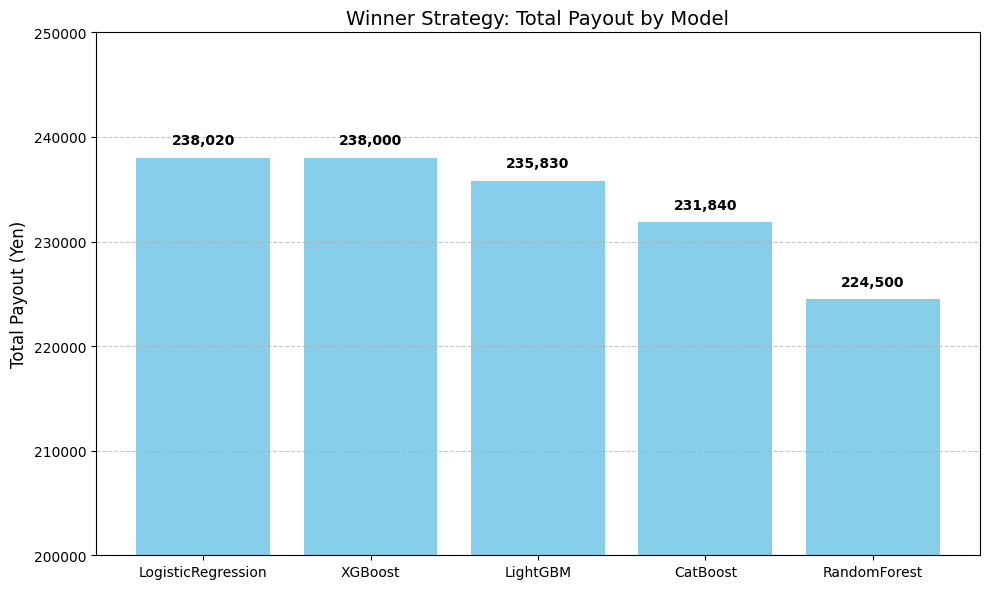

In [89]:
# 1. Extract the data from your results dictionary 
payout_list = []
for model_name, data in results_winner_tansyo.items():
    # Assuming df_res contains a 'payout' field based on your logs
    payout_list.append({'Model': model_name, 'Total Payout': data["total_payout"]})

# 2. Convert to DataFrame and Sort
df_plot = pd.DataFrame(payout_list).sort_values(by='Total Payout', ascending=False)

# 3. Create the Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_plot['Model'], df_plot['Total Payout'], color='skyblue')

# Add formatting and labels
plt.title('Winner Strategy: Total Payout by Model', fontsize=14)
plt.ylabel('Total Payout (Yen)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numeric labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{int(yval):,}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.ylim(200000, 250000)
plt.show()